Text(0, 0.5, 'Reaktivitaet[¢]')

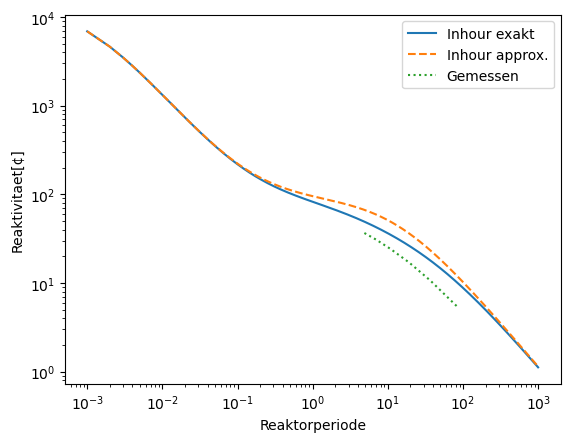

In [44]:
# Inhour solver
import numpy as np


def inhour_approx(beta,lam,T):
    l = 0.001
    return (l/(l+T)) + ((T/(l+T)) * (beta/(1 + lam * T)))

def inhour_exact(beta,lam,T):
    x = 0
    l = 0.001

    for i in range(len(beta)):
         x += beta[i]/(1 + lam[i]*T)
    return(l/(l+T)) + ((T/(l+T)) * x)
                       

def to_lam(x):
    return np.log(2)/x

def to_dollar(x):
    return x * 100/0.73

HWZ = [55.72,22.72,6.22,2.30,0.61,0.05]
lam = [to_lam(i) for i in HWZ]
Beta = [2.1*10**-4,14.1*10**-4,12.6*10**-4,25.3*10**-4,7.4*10**-4,2.7*10**-4]
T = np.linspace(0,1000,1000000)
inhour_results = []
for i in T:
    inhour_results.append(inhour_exact(Beta,lam,i))

in_cent = [to_dollar(i) * 100 for i in inhour_results]
inhour_results = []
for i in T:
    inhour_results.append(inhour_approx(64.2*10 **-4,1/13,i))

in_cent_approx = [to_dollar(i) * 100 for i in inhour_results]


reaktorperiode = [
82.2,
36.58,
19.08,
10.785,
7,
4.46
]

rho = [
5.5,
10.7,
17.1,
24.3,
30.8,
38.2
]

import matplotlib.pyplot as plt
plt.loglog(T[1:],in_cent[1:],label="Inhour exakt")
plt.loglog(T[1:],in_cent_approx[1:],label="Inhour approx.",linestyle="--")
plt.loglog(reaktorperiode,rho,label="Gemessen",linestyle=":")
plt.legend()

# plt.title("Inhour Gleichung exakt")
plt.xlabel("Reaktorperiode")
plt.ylabel("Reaktivitaet[¢]")



Text(0, 0.5, 'Reaktivitaet[¢]')

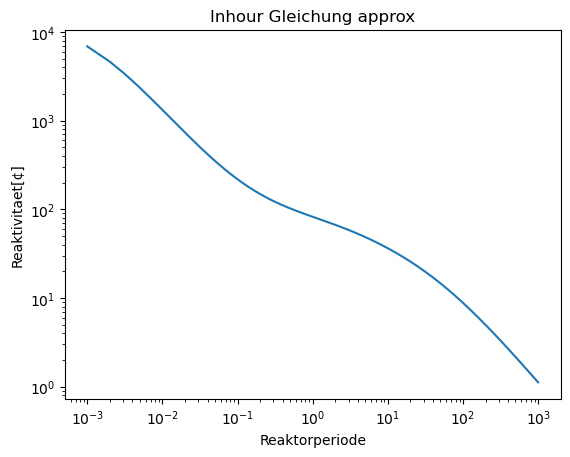

In [45]:

plt.loglog(T[1:],in_cent[1:])
plt.title("Inhour Gleichung approx")
plt.xlabel("Reaktorperiode")
plt.ylabel("Reaktivitaet[¢]")

